

# Loan Approval Classification

---

## **Steps to Follow**

1. Understanding the Problem Statement
2. Data Collection and Preparation
3. Building the Machine Learning Model
4. Model Optimization
5. Deploying the Model

---

##  **1. Understanding the Problem Statement**

### Problem Overview

Loan approval is a crucial process for financial institutions. It involves evaluating whether an applicant is **creditworthy** and **likely to repay the loan**. Incorrect decisions may result in:

* **Financial losses** due to high-risk approvals
* **Lost revenue** from rejecting eligible applicants

This project aims to build a **classification model** that predicts whether a loan application should be approved based on historical data. This system will **automate** and **streamline** the credit assessment process.

###  Objectives

* Predict loan approval outcomes (Approved / Not Approved)
* Automate credit assessment to enhance operational efficiency
* Ensure fair and consistent evaluation of applicants

###  Business Value

A well-performing model will enable the financial institution to:

* Reduce loan default losses
* Approve more creditworthy applicants efficiently
* Improve customer satisfaction through faster decision-making
* Derive insights from historical data to fine-tune risk strategies

---

##  **2. Data Collection and Preparation**

###  **Data Source**

We are using a **simulated Loan Prediction dataset**, reflective of real-world data used by financial institutions for credit evaluation.

* **Rows:** 45,000
* **Columns:** 14
* **Target Variable:** `loan_status` (1 = Approved, 0 = Not Approved)

---

###  **Key Feature Categories**

| Category           | Features                                                                                     |
| ------------------ | -------------------------------------------------------------------------------------------- |
| Personal Info   | `person_gender`, `person_age`, `person_education`, `person_home_ownership`, `person_emp_exp` |
| Financial Info  | `person_income`, `loan_amnt`, `loan_percent_income`, `loan_int_rate`                         |
| Credit Profile  | `credit_score`, `cb_person_cred_hist_length`, `previous_loan_defaults_on_file`               |
| Loan Details    | `loan_intent`                                                                                |
| Target Variable | `loan_status`                                                                                |

---

###  **Data Preparation Steps**

*  Data Loading: Import the dataset into the environment (e.g., Jupyter Notebook)
*  Exploratory Data Analysis (EDA): Understand feature distributions, detect outliers, and spot missing values
*  Data Cleaning: Handle missing values, format corrections, and resolve inconsistencies
*  Feature Engineering: Create or transform variables to better represent patterns in the data
*  Feature Selection: Choose the most predictive features to improve model performance





In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:


from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [53]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
df.shape

(45000, 14)

#### Summary of Numerical Features


In [7]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


#### Checking for missing values

In [8]:
#checking for missing values
df.isnull().sum()


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

#### unique values

In [9]:
# checking for the counts of unique values
for col in df.columns:
    print(f"{col}|| {len(df[col].unique())} unique values")

person_age|| 60 unique values
person_gender|| 2 unique values
person_education|| 5 unique values
person_income|| 33989 unique values
person_emp_exp|| 63 unique values
person_home_ownership|| 4 unique values
loan_amnt|| 4483 unique values
loan_intent|| 6 unique values
loan_int_rate|| 1302 unique values
loan_percent_income|| 64 unique values
cb_person_cred_hist_length|| 29 unique values
credit_score|| 340 unique values
previous_loan_defaults_on_file|| 2 unique values
loan_status|| 2 unique values


In [10]:
#creating variables for categorical and numerical columns
cat_cols = [var for var in df.columns if df[var].dtypes == 'object']
num_cols = [var for var in df.columns if df[var].dtypes != 'object']

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')


Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


### plotting categorical variables

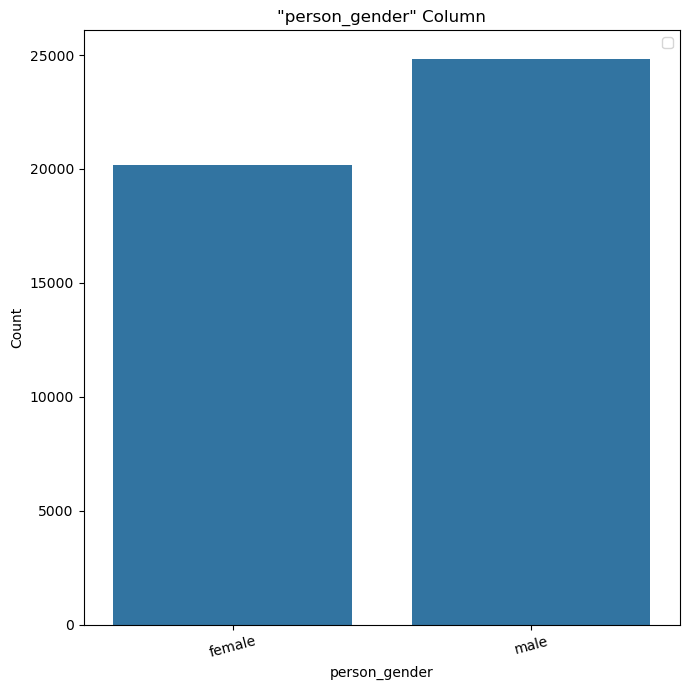

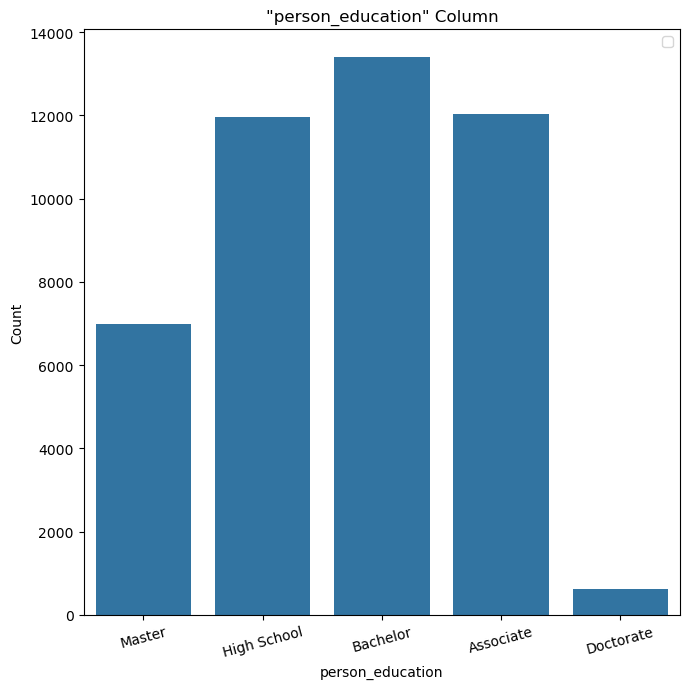

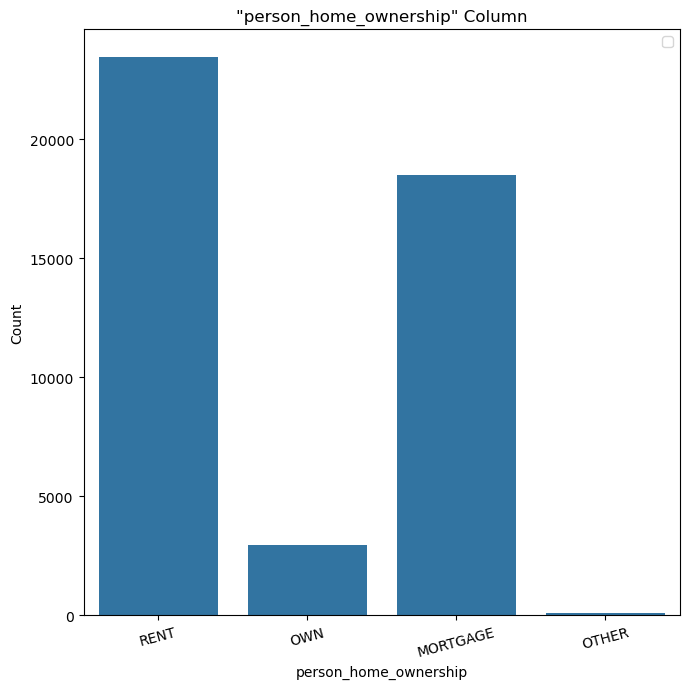

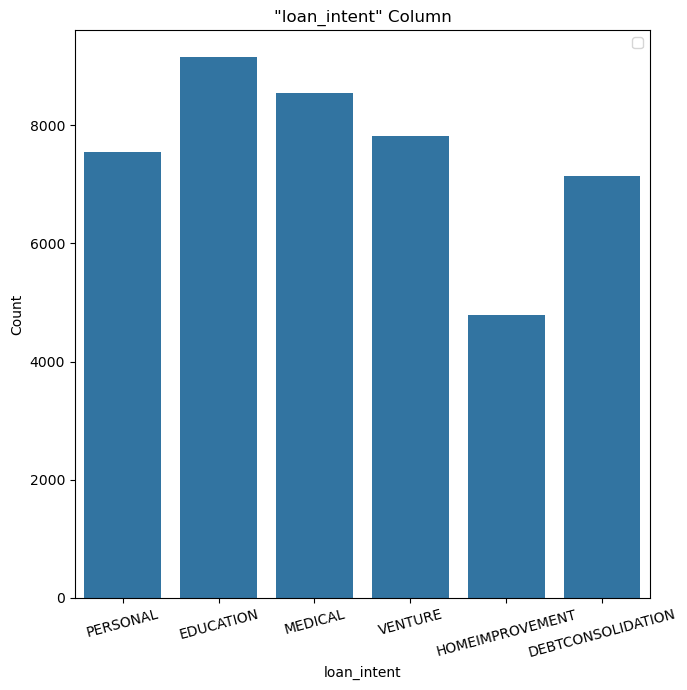

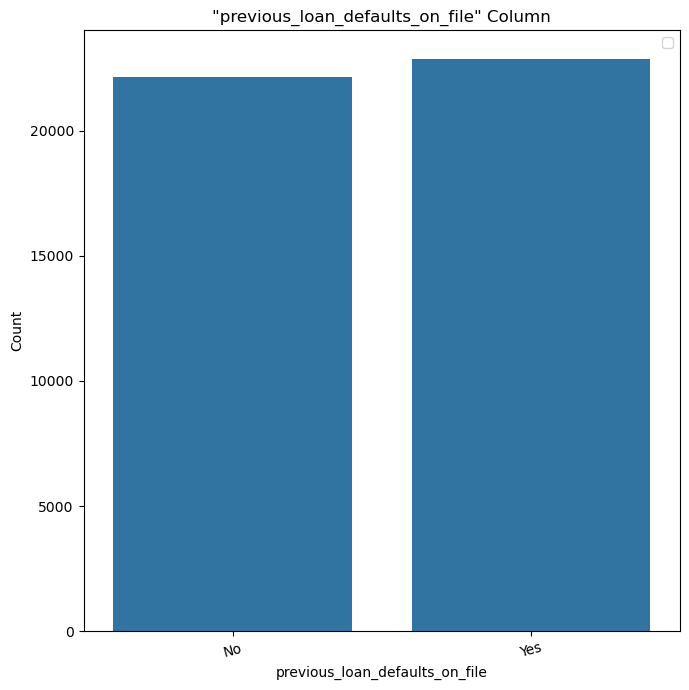

In [11]:
#plotting categorical variables

def plot_categorical_column(dataframe, column):
    plt.figure(figsize=(7, 7))
    ax = sns.countplot(x=dataframe[column])    
    plt.title(f'"{column}" Column')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.xticks(rotation=15)
    plt.tight_layout()
    
    plt.legend()
    plt.show()

for col in cat_cols:
    plot_categorical_column(df, col)


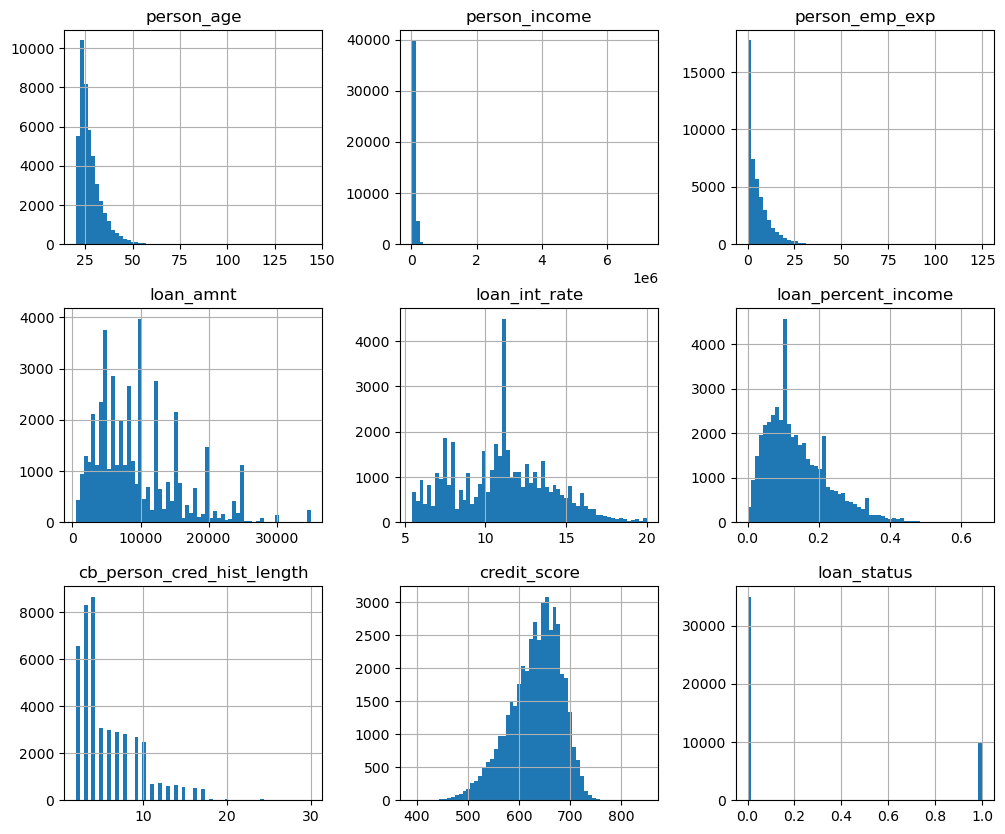

person_income                 34.137583
person_emp_exp                 2.594917
person_age                     2.548154
cb_person_cred_hist_length     1.631720
loan_status                    1.336351
loan_amnt                      1.179731
loan_percent_income            1.034512
loan_int_rate                  0.213784
credit_score                  -0.610261
dtype: float64

In [12]:
#ploting the nums cols and checking the skewness

df[num_cols].hist(bins=60, figsize=(12,10))
plt.show()
df[num_cols].skew().sort_values(ascending=False)

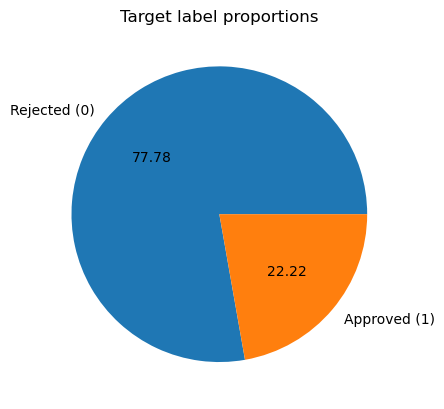

In [13]:
#checking the targed imbalance 

label_prop = df['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

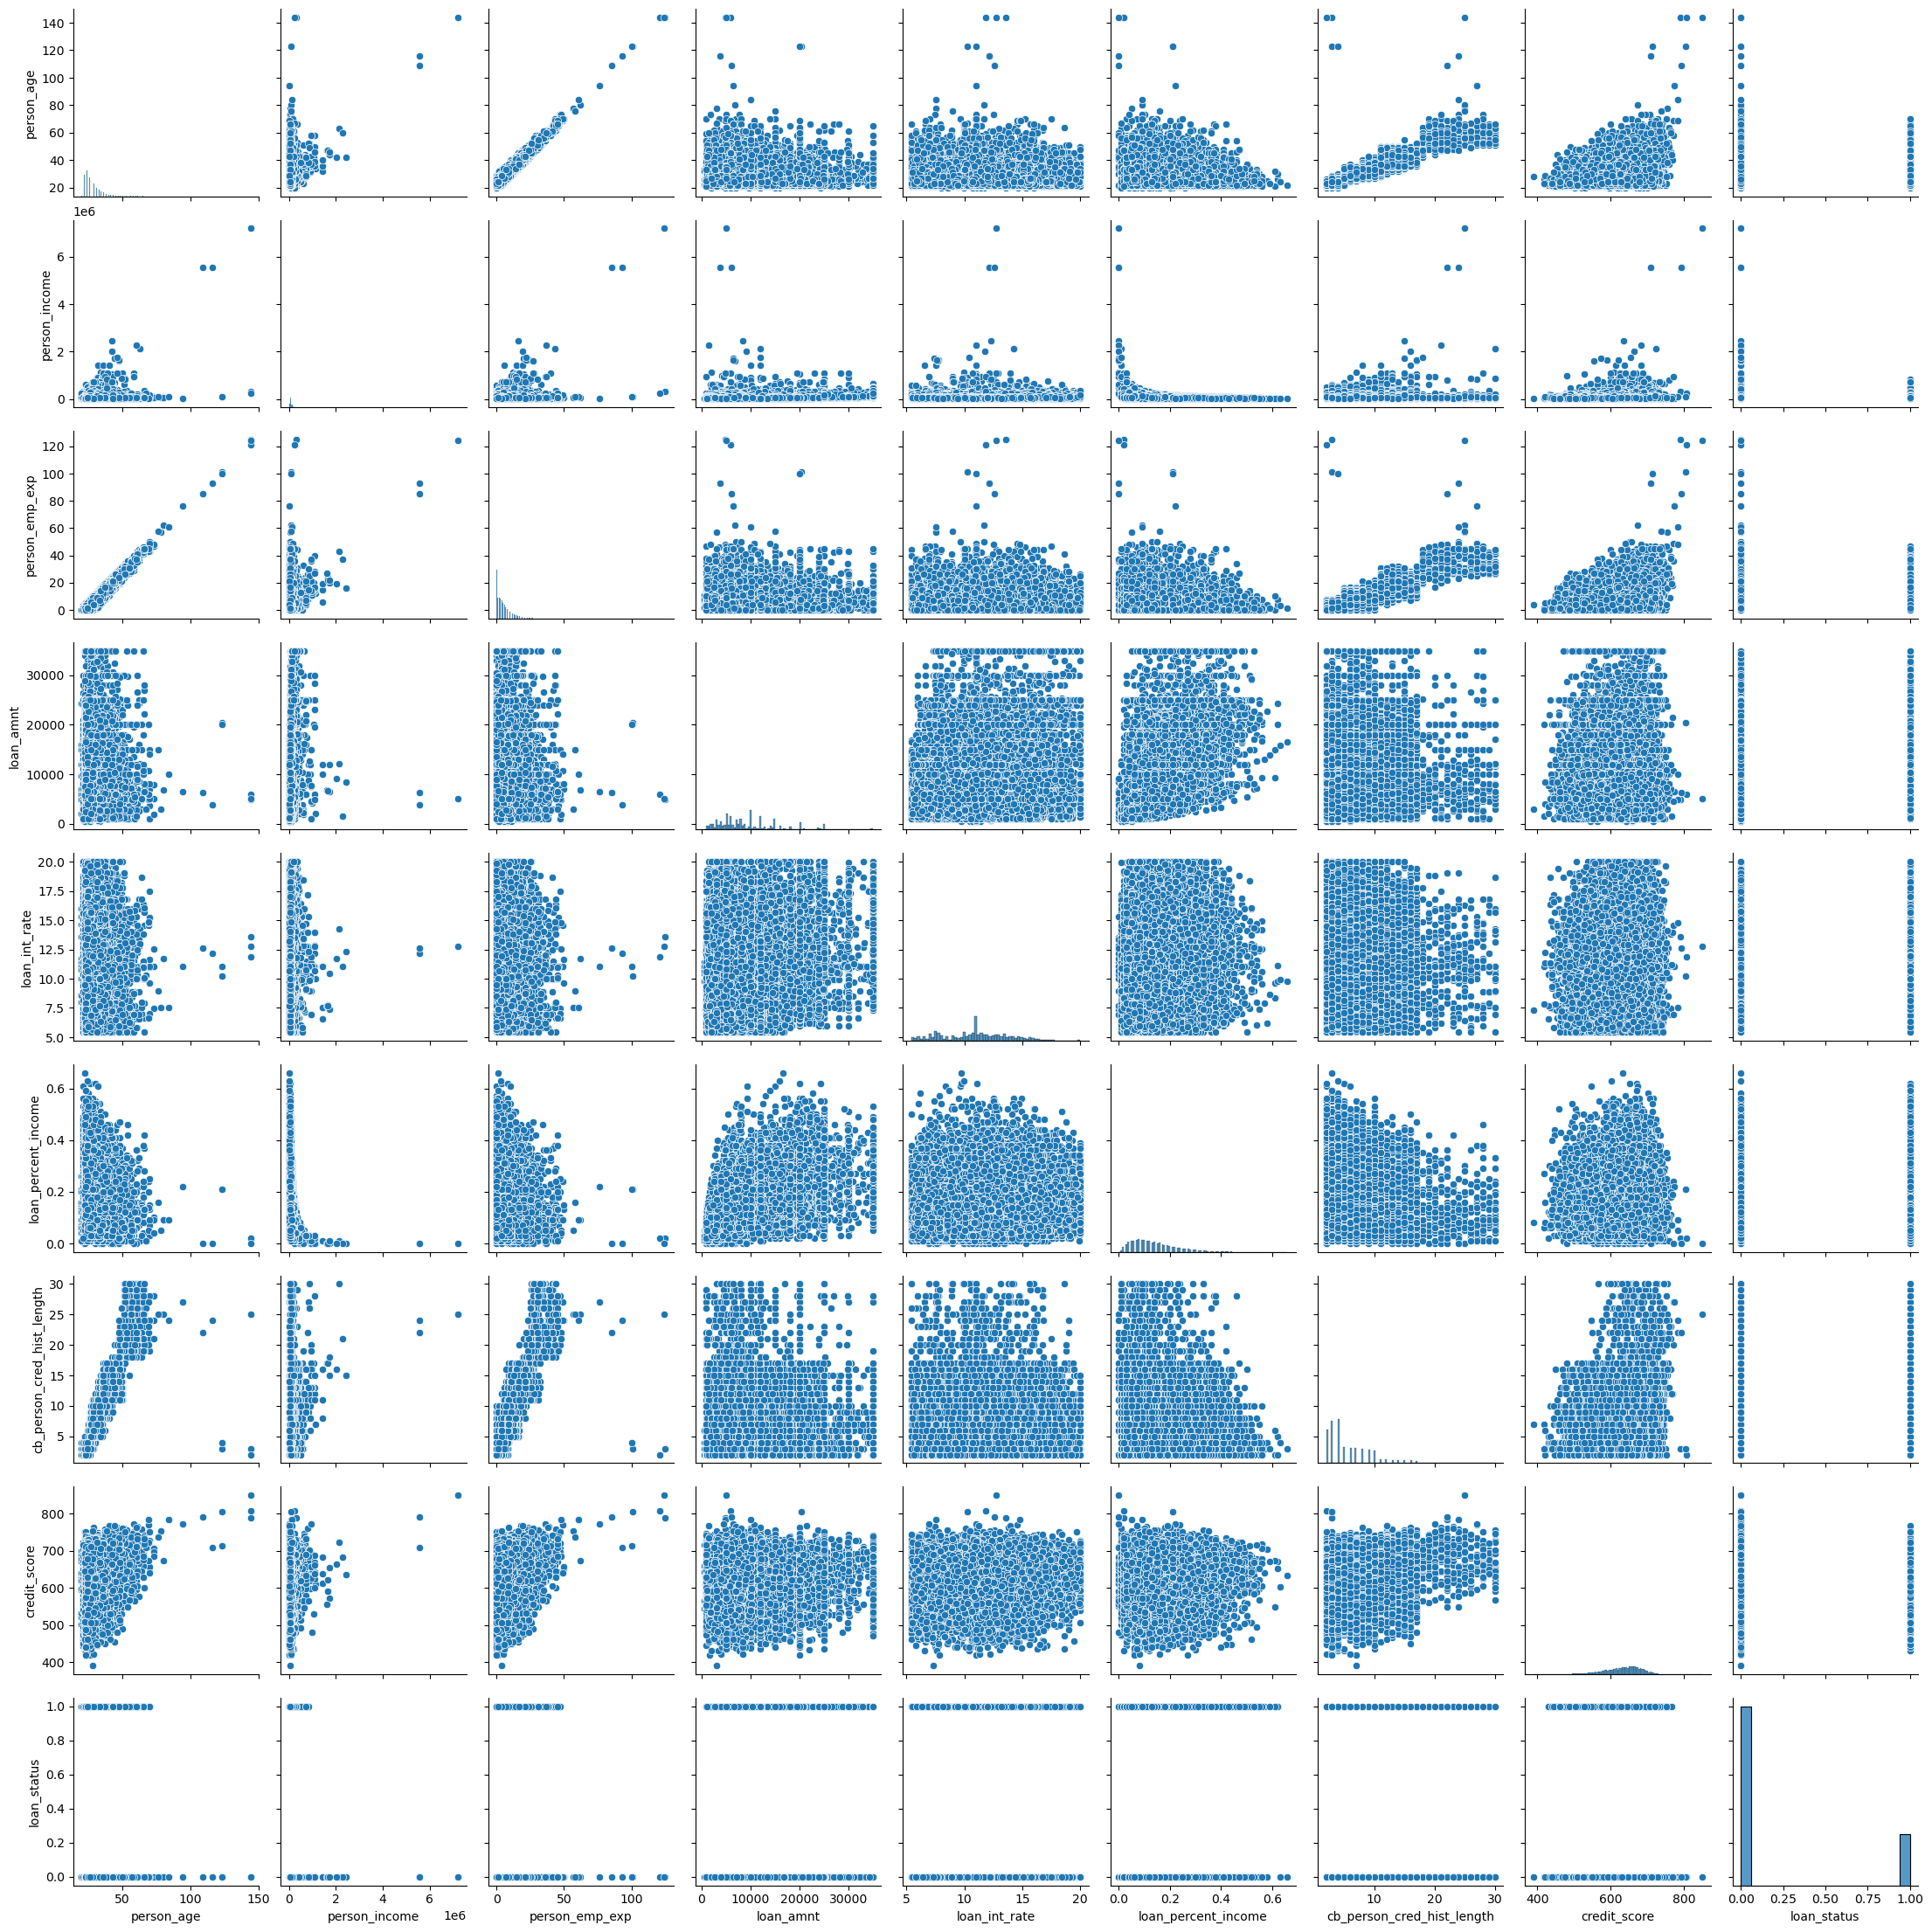

In [14]:
sns.pairplot(df)

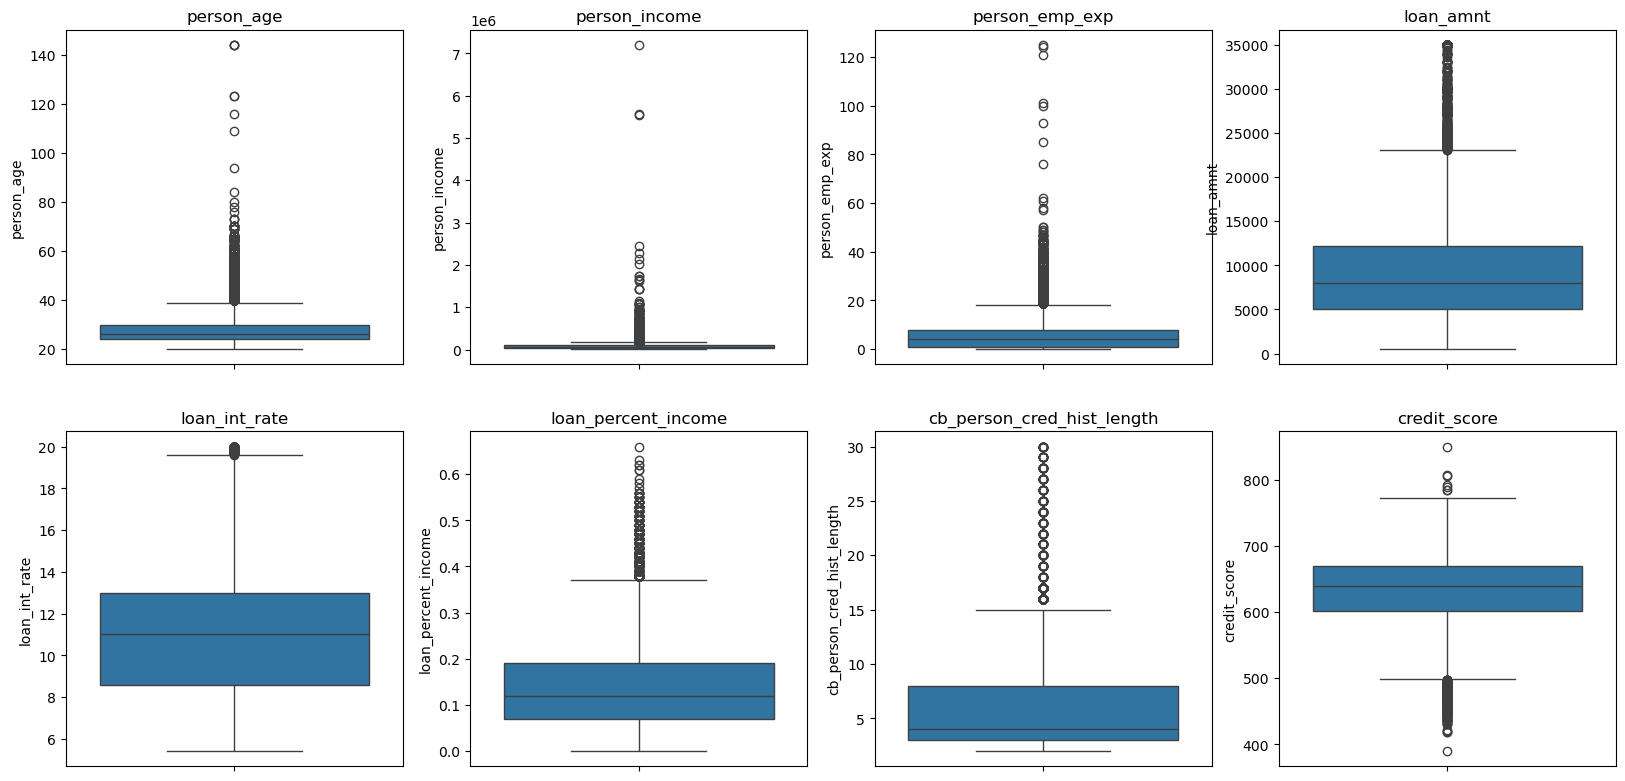

In [55]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

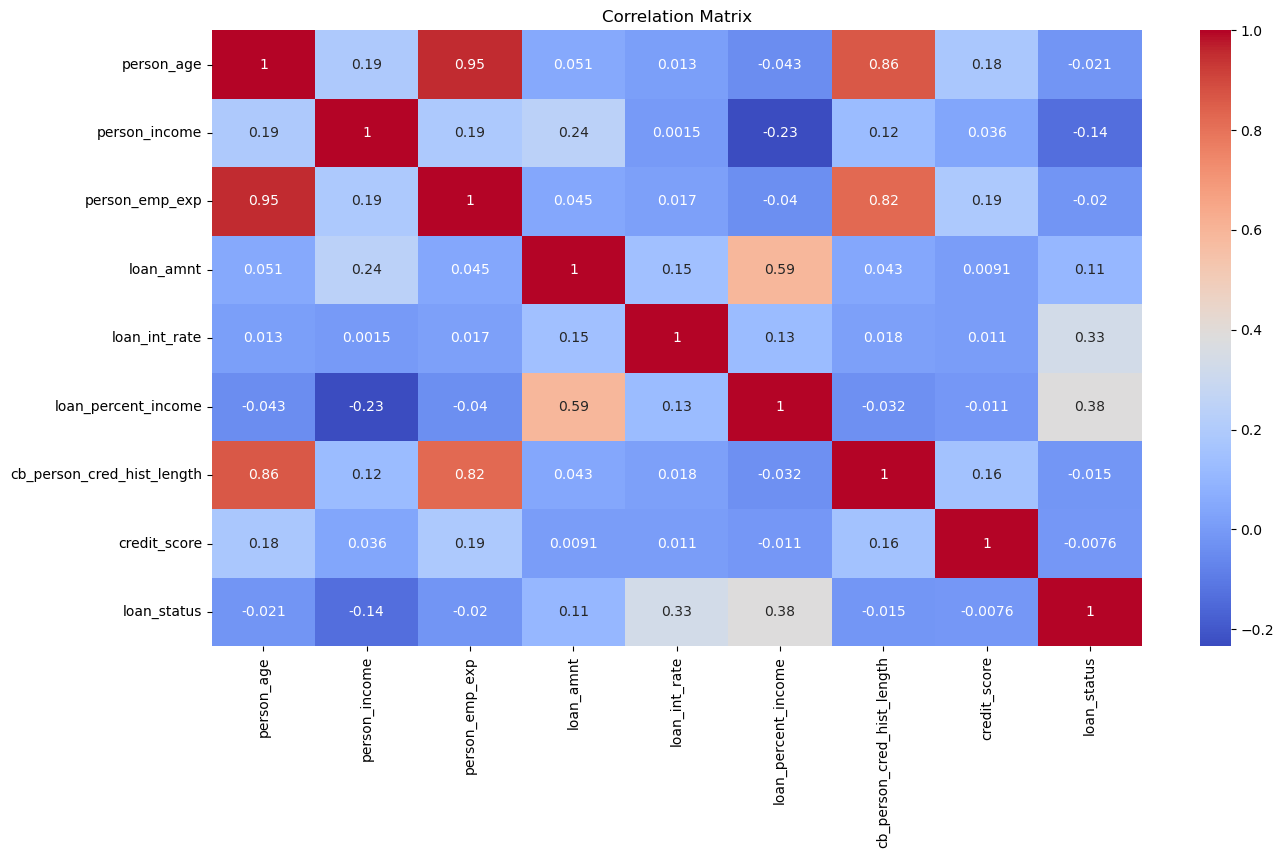

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing


In [ ]:
df['person_age'] = df['person_age'].astype('int')
df['person_age'].dtypes


In [51]:
age_threshold = 80
df = df[df['person_age'] <= age_threshold]

# Step 3: Remove outliers for person_income using the 99th percentile
income_threshold = df['person_income'].quantile(0.99)  # 99th percentile
df = df[df['person_income'] <= income_threshold]

# Step 4: Remove outliers for person_emp_exp
emp_exp_threshold = 60
df = df[df['person_emp_exp'] <= emp_exp_threshold]

# Building the Machine Learning Model

####  Feature-Target Split

In [18]:

X_selected = df.drop('loan_status',axis=1)
Y = df["loan_status"]

num_cols = X_selected.select_dtypes(include='number').columns
cat_cols = X_selected.select_dtypes(include='object').columns

### Splitting the data for Training and Testing the model

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36000, 13), (36000,), (9000, 13), (9000,))

In [20]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

## Data Preprocessing Pipeline

In [21]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import recall_score, classification_report, f1_score
import numpy as np

num_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])



## Logistic Regression

In [ ]:
final_pipeline = Pipeline([
    ('preprocess', preprocessor),                            
    ('smote', SMOTE(random_state=42)),                     
    ('feature_select', SelectKBest(score_func=f_classif, k='all')), 
    ('classifier', LogisticRegression(class_weight='balanced'))    
])


final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_select', SelectKBest(k='all')),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [23]:
y_pred = final_pipeline.predict(X_test)

In [24]:
final_pipeline.score(X_train, y_train)
print(classification_report(y_pred,y_test))
print(recall_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      6096
           1       0.91      0.63      0.75      2904

    accuracy                           0.86      9000
   macro avg       0.88      0.80      0.83      9000
weighted avg       0.87      0.86      0.85      9000

0.6322314049586777


# Model Optimization

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the models and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1500),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__solver': ['saga', 'liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 10, 20, 30, 40],
            'classifier__min_samples_split': [2,5, 10, 20]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(max_iter=2000, tol=1e-3),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto', 0.01, 0.1]
        }
    },

}

results = []


# Train and evaluate each model
for model_name, model_info in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),                           
        ('smote', SMOTE(random_state=42)),                       
        ('classifier', model_info['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='recall', n_jobs=-1)
    grid_search.fit(X_train, y_train.ravel())
    
    best_model = grid_search.best_estimator_
    
    
    y_test_pred = best_model.predict(X_test)
    test_recall = recall_score(y_test, y_test_pred,)
    
    result = {
        'model': model_name,
        'best_params': grid_search.best_params_,
        'test_recall': test_recall,
        'classification_report_test': classification_report(y_test, y_test_pred)
    }
    
    results.append(result)
    print(f'{result['model']} best recall score: {result['test_recall']}')




Logistic Regression best recall score: 0.9134328358208955
Decision Tree best recall score: 0.8820895522388059
Random Forest best recall score: 0.9034825870646767


/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarn

SVM best recall score: 0.9651741293532339


In [27]:
n = 1
for i in results:
    print(f"{n}- {i['model']}\nBest Parameters - {i['best_params']}\nRecall Score - {i['test_recall']}\n")
    n+=1

1- Logistic Regression
Best Parameters - {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
Recall Score - 0.9134328358208955

2- Decision Tree
Best Parameters - {'classifier__max_depth': 10, 'classifier__min_samples_split': 20}
Recall Score - 0.8820895522388059

3- Random Forest
Best Parameters - {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Recall Score - 0.9034825870646767

4- SVM
Best Parameters - {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Recall Score - 0.9651741293532339



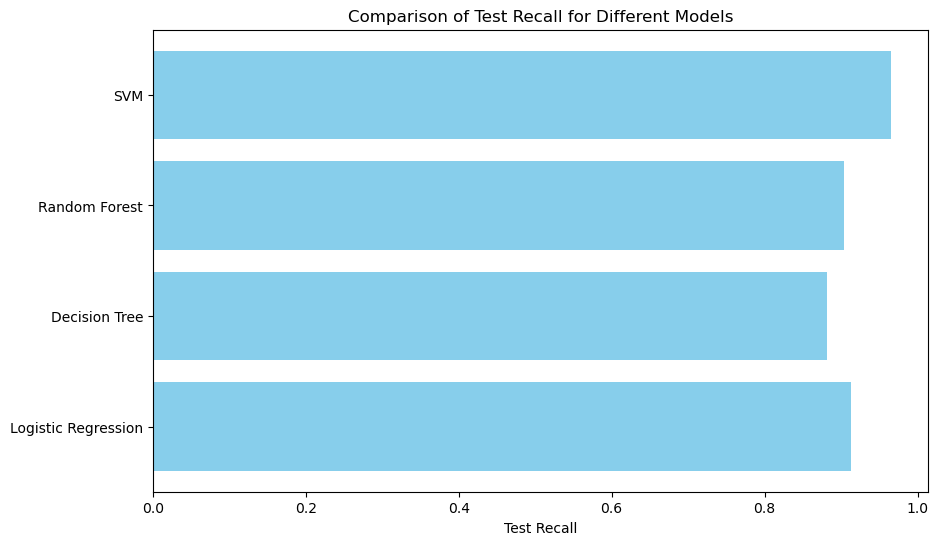

In [42]:
plt.figure(figsize=(10, 6))
model_names = [result['model'] for result in results]
test_recalls = [result['test_recall'] for result in results]
plt.barh(model_names, test_recalls, color='skyblue')
plt.xlabel('Test Recall')
plt.title('Comparison of Test Recall for Different Models')
plt.show()
results_df = pd.DataFrame(results)


In [44]:
results_df.head(10)

,model,best_params,test_recall,classification_report_test
0,Logistic Regression,"{'classifier__C': 0.1, 'classifier__solver': '...",0.913433,precision recall f1-score ...
1,Decision Tree,"{'classifier__max_depth': 10, 'classifier__min...",0.882090,precision recall f1-score ...
2,Random Forest,"{'classifier__max_depth': 10, 'classifier__n_e...",0.903483,precision recall f1-score ...
3,SVM,"{'classifier__C': 0.1, 'classifier__gamma': 's...",0.965174,precision recall f1-score ...


In [46]:
n = 1
for i in results:
    print(f"{n}- {i['model']} Classification Report \n {i['classification_report_test']}")
    n+=1

1- Logistic Regression Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.85      0.90      6990
           1       0.63      0.91      0.75      2010

    accuracy                           0.86      9000
   macro avg       0.80      0.88      0.83      9000
weighted avg       0.90      0.86      0.87      9000

2- Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.89      0.93      6990
           1       0.70      0.88      0.78      2010

    accuracy                           0.89      9000
   macro avg       0.83      0.89      0.85      9000
weighted avg       0.91      0.89      0.89      9000

3- Random Forest Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      6990
           1       0.69      0.90      0.78      2010

    accuracy                           0.89      9000

In [ ]:
import joblib
from imblearn.pipeline import Pipeline

svm_model = SVC(C=0.1, gamma='scale', kernel='linear', probability=True)

# Final pipeline with SMOTE and SVM
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', svm_model)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Recall Score: {recall:.4f}")

# Save the model
joblib.dump(pipeline, 'best_svm_model_pipeline.joblib')
print("Model saved as 'best_svm_model_pipeline.joblib'")


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      6990
           1       0.62      0.91      0.74      2010

    accuracy                           0.86      9000
   macro avg       0.80      0.88      0.82      9000
weighted avg       0.89      0.86      0.87      9000

Recall Score: 0.9144
✅ Model saved as 'best_svm_model_pipeline.joblib'
